<a href="https://colab.research.google.com/github/Ansalgadulu/python_ML/blob/main/NLP_FlipItNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

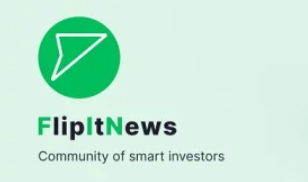

#Overview of the business
The Gurugram-based company ‘FlipItNews’ aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors

#Objective
The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,ConfusionMatrixDisplay,confusion_matrix
import numpy as np
import regex as re

In [ ]:
#I have the data in my google drive so mounting my drive on this colab notebook and then fetching it from the path
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


# Define the file path in your Google Drive
csv_path = '/content/drive/MyDrive/New folder/flipitnews-data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)
df.head(5)

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
df.isna().sum()

Category    0
Article     0
dtype: int64

1. We have 2 columns namely category and Article.
2. Article contains the text and category is the category that article belongs to .
3. We have a total of 2225 rows of data.
4. checkinf for null values using info and isna returned 0 so there are no null values



We need to train a model to best predict this text into it's category

unique categories: 5 
------------------------------
Categories:
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: Category, dtype: int64
----------------------------------------------------------------------------------------------------


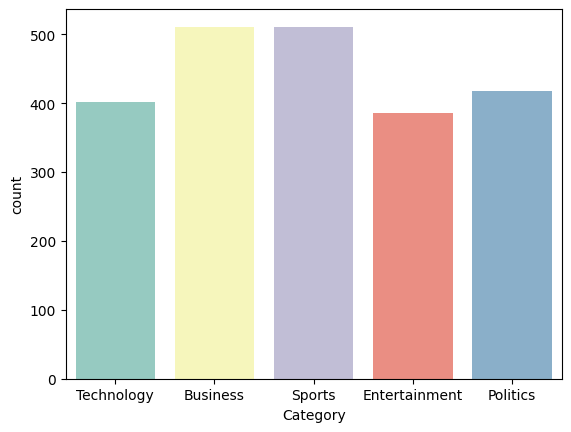

In [ ]:
#Checking the number of unique categories and their counts

cat=df["Category"].nunique()
print(f"unique categories: {cat} ")
print("-"*30)
print("Categories:")
print(df['Category'].value_counts())
print("-"*100)
sns.countplot(x='Category', data=df, palette="Set3")
plt.show()

1. We found out that there are 5 unique categories in our data for classifying the articles.
2. the unique categories are :
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
3. The data seems to be almost balanced we can later check the precision and accuracy for each category and try and balance them even more precisely and check impact on results

#Preprocessing

[]

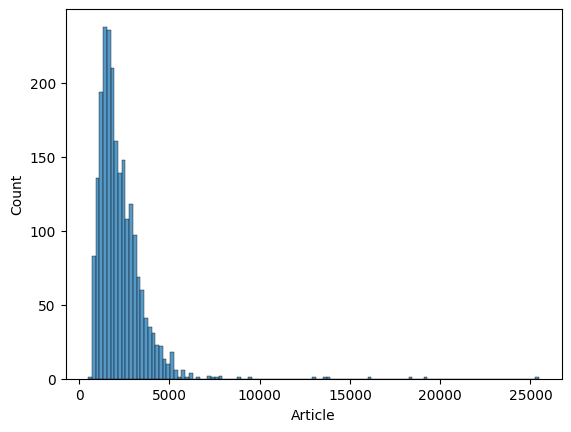

In [ ]:
# first lets check out the count of words in our articles
hist_temp=df['Article'].apply(lambda x : len(x))
sns.histplot(x=hist_temp)
plt.plot()

In [ ]:
# Create a list of percentile values from 0 to 100 with a step size of 10
percentiles = list(range(0, 101, 10))

# Calculate and print the percentile values for the Article length
percentile_values = hist_temp.quantile([percentile / 100 for percentile in percentiles])
for percentile, value in zip(percentiles, percentile_values):
    print(f"{percentile}th percentile: {value:.2f} characters")


0th percentile: 501.00 characters
10th percentile: 1123.40 characters
20th percentile: 1351.00 characters
30th percentile: 1543.00 characters
40th percentile: 1743.60 characters
50th percentile: 1965.00 characters
60th percentile: 2243.60 characters
70th percentile: 2589.60 characters
80th percentile: 2989.60 characters
90th percentile: 3628.20 characters
100th percentile: 5804.00 characters


In [ ]:
##print 90 to 100 percentile values with step size of 1.
percentiles = list(range(90, 101, 1))

# Calculate and print the percentile values for the count of words
percentile_values =hist_temp.quantile([percentile / 100 for percentile in percentiles])
for percentile, value in zip(percentiles, percentile_values):
    print(f"{percentile}th percentile: {value:.2f} characters")

90th percentile: 3628.20 characters
91th percentile: 3718.00 characters
92th percentile: 3848.24 characters
93th percentile: 3971.56 characters
94th percentile: 4134.52 characters
95th percentile: 4286.80 characters
96th percentile: 4470.76 characters
97th percentile: 4752.68 characters
98th percentile: 5101.00 characters
99th percentile: 5799.44 characters
100th percentile: 5804.00 characters


In [ ]:
#lets truncate all the articles which are longer than 99th percentile
df["Article_processed"]=df['Article'].apply(lambda x : x[: int(round(hist_temp.quantile(0.99),0))])



In [ ]:
hist_temp=df['Article_processed'].apply(lambda x : len(x))
int(round(hist_temp.quantile(1.00),0))
#We checked that the 100th percentile is now capped at 5804 words

5804

###Remove non-letters

In [ ]:
nltk.download('punkt')
def non_letters(text):
  words = word_tokenize(text)

  # Remove non-letters using regular expressions
  cleaned_words = [re.sub(r'[^a-zA-Z]', '', word) for word in words]

  # Join the cleaned words back into a sentence
  cleaned_text = ' '.join(cleaned_words)

  print("Original Text:", text)
  print("Cleaned Text:", cleaned_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
non_letters(df['Article_processed'][0])

Original Text: tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being bu

In [ ]:
def non_letters(text,min_word_length=3):
  words = word_tokenize(text)

  # Remove non-letters using regular expressions
  cleaned_words = [re.sub(r'[^a-zA-Z]', '', word) for word in words]
  cleaned_words = [word for word in cleaned_words if len(word) >= min_word_length]

  # Join the cleaned words back into a sentence
  cleaned_text = ' '.join(cleaned_words)


  # print("Original Text:", text)
  # print("Cleaned Text:", cleaned_text)
  return cleaned_text

In [ ]:
df['Article_processed_cleaned']=df['Article_processed'].apply(lambda x : non_letters(x))

In [ ]:
df.head()

,Category,Article,Article_processed,Article_processed_cleaned
0,Technology,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,future the hands viewers with home theatre sys...
1,Business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,Sports,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say they ...
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,yeading face newcastle cup premiership side ne...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve the...


###Remove Stopwords

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stop_words(text):
    words = word_tokenize(text)

    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a sentence
    filtered_text = ' '.join(filtered_words)

    # print("Original Text:", text)
    # print("Filtered Text:", filtered_text)
    return filtered_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(f"data with stopwords : {df['Article_processed_cleaned'][0]}")
print("-"*50)
print(f"removed stop words data : {remove_stop_words(df['Article_processed_cleaned'][0])}")

data with stopwords : future the hands viewers with home theatre systems plasma highdefinition tvs and digital video recorders moving into the living room the way people watch will radically different five years time that according expert panel which gathered the annual consumer electronics show las vegas discuss how these new technologies will impact one our favourite pastimes with the leading the trend programmes and other content will delivered viewers via home networks through cable satellite telecoms companies and broadband service providers front rooms and portable devices one the most talkedabout technologies ces has been digital and personal video recorders dvr and pvr these settop boxes like the tivo and the sky system allow people record store play pause and forward wind programmes when they want essentially the technology allows for much more personalised they are also being builtin highdefinition sets which are big business japan and the but slower take off europe because t

In [ ]:
df['Article_processed_cleaned_stop_word_remove']=df['Article_processed_cleaned'].apply(lambda x : remove_stop_words(x))
df.head()

,Category,Article,Article_processed,Article_processed_cleaned,Article_processed_cleaned_stop_word_remove
0,Technology,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,future the hands viewers with home theatre sys...,future hands viewers home theatre systems plas...
1,Business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...,worldcom boss left books alone former worldcom...
2,Sports,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say they ...,tigers wary farrell gamble leicester say rushe...
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,yeading face newcastle cup premiership side ne...,yeading face newcastle cup premiership side ne...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve the...,ocean twelve raids box office ocean twelve cri...


###Lemmatization

In [ ]:
nltk.download('wordnet')
def lemmetization_flipitnews(text):
  words = word_tokenize(text)

  # Initialize the WordNetLemmatizer
  lemmatizer = WordNetLemmatizer()

  # Lemmatize words
  lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words]

  # Join the lemmatized words back into a sentence
  lemmatized_text = ' '.join(lemmatized_words)

  # print("Original Text:", text)
  # print("Lemmatized Text:", lemmatized_text)
  return lemmatized_text

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
print(f"data without lemmetization : {df['Article_processed_cleaned_stop_word_remove'][0]}")
print("-"*50)
print(f"data with lemmetization : {lemmetization_flipitnews(df['Article_processed_cleaned_stop_word_remove'][0])}")

data without lemmetization : future hands viewers home theatre systems plasma highdefinition tvs digital video recorders moving living room way people watch radically different five years time according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talkedabout technologies ces digital personal video recorders dvr pvr settop boxes like tivo sky system allow people record store play pause forward wind programmes want essentially technology allows much personalised also builtin highdefinition sets big business japan slower take europe lack highdefinition programming people forward wind adverts also forget abiding network channel schedules putting together alacarte entertainment networks cable satellite companies worried means terms advertising revenues w

In [ ]:
df['Article_preprocessed']=df['Article_processed_cleaned_stop_word_remove'].apply(lambda x : lemmetization_flipitnews(x))
df.head()

,Category,Article,Article_processed,Article_processed_cleaned,Article_processed_cleaned_stop_word_remove,Article_preprocessed
0,Technology,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,future the hands viewers with home theatre sys...,future hands viewers home theatre systems plas...,future hand viewer home theatre system plasma ...
1,Business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...,worldcom boss left books alone former worldcom...,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say they ...,tigers wary farrell gamble leicester say rushe...,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,yeading face newcastle cup premiership side ne...,yeading face newcastle cup premiership side ne...,yeading face newcastle cup premiership side ne...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve the...,ocean twelve raids box office ocean twelve cri...,ocean twelve raid box office ocean twelve crim...


###Word Tokenize the text

In [ ]:
df_final=df[['Article_preprocessed','Category']]
df_final.head()

,Article_preprocessed,Category
0,future hand viewer home theatre system plasma ...,Technology
1,worldcom bos left book alone former worldcom b...,Business
2,tiger wary farrell gamble leicester say rushed...,Sports
3,yeading face newcastle cup premiership side ne...,Sports
4,ocean twelve raid box office ocean twelve crim...,Entertainment


In [ ]:

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df_final['Category'].values.reshape(-1, 1).ravel())

print("Encoded Labels:", encoded_labels)

Encoded Labels: [4 0 3 ... 1 2 3]


In [ ]:

def get_text_representation(data, representation='bow'):
    """
    Get the text representation of sentences in a DataFrame column.

    Parameters:
    - data (pd.Series): The DataFrame column containing sentences.
    - representation (str): 'bow' for Bag of Words, 'tfidf' for TF-IDF.

    Returns:
    - text_representation (sparse matrix): Text representation matrix.
    """
    if representation == 'bow':
        vectorizer = CountVectorizer()
    elif representation == 'tfidf':
        vectorizer = TfidfVectorizer()
    else:
        raise ValueError("Invalid representation type. Choose 'bow' or 'tfidf'.")

    text_representation = vectorizer.fit_transform(data)
    return text_representation,vectorizer


In [ ]:

# Split data into training and testing sets
train_data, test_data = train_test_split(df_final, test_size=0.3, random_state=42)

# Obtain BoW representation for training and testing data
temp=get_text_representation(train_data['Article_preprocessed'], representation='bow')
temp_1=get_text_representation(train_data['Article_preprocessed'], representation='tfidf')
train_bow = temp[0]
test_bow = temp[1].transform(test_data['Article_preprocessed'])
# Get target labels for training and testing data
train_tfidf = temp_1[0]
test_tfidf = temp_1[1].transform(test_data['Article_preprocessed'])
train_labels = train_data['Category']
test_labels = test_data['Category']
# Apply one-hot encoding to the training data
encoded_train_labels = label_encoder.fit_transform(train_labels.values.reshape(-1, 1).ravel())

# Apply the same encoding to the testing data
encoded_test_labels = label_encoder.transform(test_labels.values.reshape(-1, 1).ravel())
print("Number of training documents:", train_bow.shape[0])
print("Number of testing documents:", test_bow.shape[0])

Number of training documents: 1557
Number of testing documents: 668


#Naive Bayes

In [ ]:
naive_bayes_model = MultinomialNB()
# Convert sparse matrices to dense arrays
train_bow_dense = train_bow.toarray()
test_bow_dense = test_bow.toarray()


# Create a Naive Bayes model (MultinomialNB)
naive_bayes_model = MultinomialNB()

# Train the model
naive_bayes_model.fit(train_bow_dense, encoded_train_labels)

# Predict on the testing set
predicted_labels_NV = naive_bayes_model.predict(test_bow_dense)

# Calculate accuracy
accuracy = accuracy_score(encoded_test_labels, predicted_labels_NV)
print("Accuracy:", accuracy)
precision, recall, f1, _ = precision_recall_fscore_support(encoded_test_labels, predicted_labels_NV, average=None)

# Print class-wise results
for class_idx, class_label in enumerate(label_encoder.classes_):
    print(f"Class: {class_label}")
    print(f"Precision: {precision[class_idx]}")
    print(f"Recall: {recall[class_idx]}")
    print(f"F1-score: {f1[class_idx]}")
    print()

Accuracy: 0.9715568862275449
Class: Business
Precision: 0.9872611464968153
Recall: 0.9451219512195121
F1-score: 0.9657320872274143

Class: Entertainment
Precision: 1.0
Recall: 0.9380530973451328
F1-score: 0.9680365296803652

Class: Politics
Precision: 0.9105691056910569
Recall: 0.9911504424778761
F1-score: 0.9491525423728814

Class: Sports
Precision: 0.9931506849315068
Recall: 0.9931506849315068
F1-score: 0.9931506849315068

Class: Technology
Precision: 0.9632352941176471
Recall: 0.9924242424242424
F1-score: 0.9776119402985075



In [ ]:
#using tf idf instead of bag of words vecotirzer
naive_bayes_model = MultinomialNB()
# Convert sparse matrices to dense arrays
train_tf_dense = train_tfidf.toarray()
test_tf_dense = test_tfidf.toarray()


# Create a Naive Bayes model (MultinomialNB)
naive_bayes_model = MultinomialNB()

# Train the model
naive_bayes_model.fit(train_tf_dense, encoded_train_labels)

# Predict on the testing set
predicted_labels_NV = naive_bayes_model.predict(test_tf_dense)

# Calculate accuracy
accuracy = accuracy_score(encoded_test_labels, predicted_labels_NV)
print("Accuracy:", accuracy)
precision, recall, f1, _ = precision_recall_fscore_support(encoded_test_labels, predicted_labels_NV, average=None)

# Print class-wise results
for class_idx, class_label in enumerate(label_encoder.classes_):
    print(f"Class: {class_label}")
    print(f"Precision: {precision[class_idx]}")
    print(f"Recall: {recall[class_idx]}")
    print(f"F1-score: {f1[class_idx]}")
    print()

Accuracy: 0.9715568862275449
Class: Business
Precision: 0.9751552795031055
Recall: 0.9573170731707317
F1-score: 0.966153846153846

Class: Entertainment
Precision: 1.0
Recall: 0.9292035398230089
F1-score: 0.9633027522935781

Class: Politics
Precision: 0.9256198347107438
Recall: 0.9911504424778761
F1-score: 0.9572649572649573

Class: Sports
Precision: 0.9864864864864865
Recall: 1.0
F1-score: 0.9931972789115647

Class: Technology
Precision: 0.9699248120300752
Recall: 0.9772727272727273
F1-score: 0.9735849056603774



We are getting similar results using both tfidf and bag of words counters in this case we see slight improvement in f1 score entertainment which is negligible

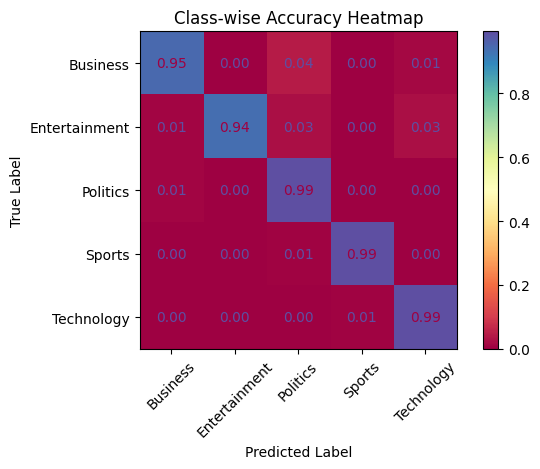

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(encoded_test_labels, predicted_labels_NV, normalize='true')

# Create a list of class labels
class_labels = label_encoder.classes_

# Plot class-wise accuracy heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Spectral', values_format=".2f")

plt.title("Class-wise Accuracy Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Additional : Decision Tree

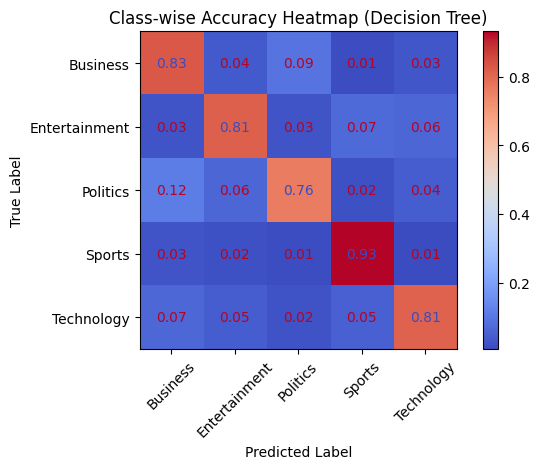

In [ ]:
# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Train the model
decision_tree_model.fit(train_bow, encoded_train_labels)

# Predict on the testing set
predicted_labels_DT = decision_tree_model.predict(test_bow)

# Calculate confusion matrix
cm = confusion_matrix(encoded_test_labels, predicted_labels_DT, normalize='true')

# Create a list of class labels
class_labels = label_encoder.classes_

# Plot class-wise accuracy heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='coolwarm', values_format=".2f")

plt.title("Class-wise Accuracy Heatmap (Decision Tree)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Additional : Random Forest

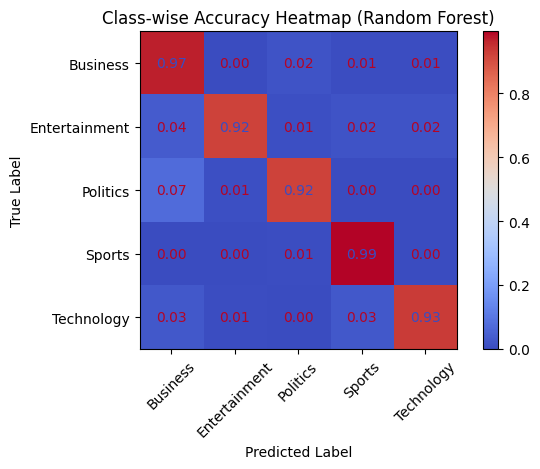

In [ ]:
# Create a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=150)  # You can adjust n_estimators as needed

# Train the model
random_forest_model.fit(train_bow, encoded_train_labels)

# Predict on the testing set
predicted_labels_RF = random_forest_model.predict(test_bow)

# Calculate confusion matrix
cm = confusion_matrix(encoded_test_labels, predicted_labels_RF, normalize='true')

# Create a list of class labels
class_labels = label_encoder.classes_

# Plot class-wise accuracy heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='coolwarm', values_format=".2f")

plt.title("Class-wise Accuracy Heatmap (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Additional : KNN

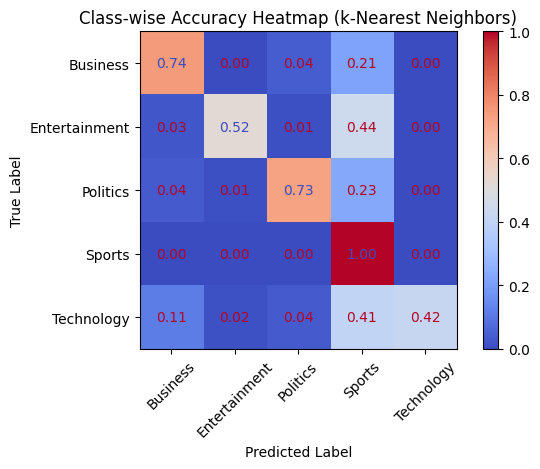

In [ ]:
# Create a k-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Train the model
knn_model.fit(train_bow, encoded_train_labels)

# Predict on the testing set
predicted_labels_KNN = knn_model.predict(test_bow)

# Calculate confusion matrix
cm = confusion_matrix(encoded_test_labels, predicted_labels_KNN, normalize='true')

# Create a list of class labels
class_labels = label_encoder.classes_

# Plot class-wise accuracy heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='coolwarm', values_format=".2f")

plt.title("Class-wise Accuracy Heatmap (k-Nearest Neighbors)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Comparing the models

In [ ]:
#lets compare all 4 models as above
models_compare={}
for i,j in zip([predicted_labels_KNN,predicted_labels_RF,predicted_labels_DT,predicted_labels_NV],["KNN","Random Forest","Decision Tree","Naive Bayes"]):
  precision, recall, f1, _ = precision_recall_fscore_support(encoded_test_labels, i, average=None)
  models_compare[j]=[precision.mean(), recall.mean(), f1.mean()]
  # print(i,j)


In [ ]:
final_res=pd.DataFrame(models_compare,index=['precision',"recall","f1"])
final_res
#We can see the final avg scores for all the above 4 models as shown below random forest and Naive Bayes return the best scores

,KNN,Random Forest,Decision Tree,Naive Bayes
precision,0.826289,0.954794,0.830734,0.970843
recall,0.683186,0.947038,0.829320,0.971980
f1,0.697930,0.950281,0.829687,0.970737


#Inference

In [ ]:
# i have written the below function for infering given any sentense as output
def infer(text):
  text=text[:5804]# clip as we clipped the train data as well
  text=non_letters(text)
  text=remove_stop_words(text)
  text=lemmetization_flipitnews(text)
  text_encode=temp[1].transform([text])
  text_final=text_encode.toarray()
  predict=naive_bayes_model.predict(text_final)
  return label_encoder.classes_[predict]

##I have taken random articles from the internet below and in 3 of the cases the category returned is accurate

In [ ]:
infer("The ODI World Cup 2023 in India is less that two months away but the hosts' team combination is nowhere close to being sorted. Much like the 2019 World Cup, the one slot which is bothering India is the No. 4 slot.  No batter has succeeded in settling into the vital number four slot in the Indian ODI team since the retirement of Yuvraj Singh, captain Rohit Sharma said on Thursday, raising serious concerns before the World Cup. With the 50-over World Cup less than two months away, India are struggling to find a batter for the No. 4 slot, something that has also troubled them in the previous edition in 2019 in England.")

array(['Sports'], dtype=object)

In [ ]:
infer("Ironically, a film titled Jailer cannot be contained in one single genre, which, of course, is the definition of a masala film. However, in this film, the shift from one genre to the other is pretty distinct and interesting. At one instance, we are watching a family drama, then it becomes a revenge saga, and then it transforms into something which I will not reveal because it will be a spoiler. And the surprises keep coming, just like the enjoyable cameos. A part of Rajinikanth’s punchline in Jailer goes like this, “I am the king here. My words are the rules. And I will keep changing it on a whim.” It’s like Nelson telling about how he handles the film here. The rules and genres of Jailer keep changing, but one cannot complain because it is pure entertainment.")

array(['Entertainment'], dtype=object)

In [ ]:
infer("Multi-billionaire Elon Musk is putting Twitter building signs and other items from the company up for auction just weeks after the firm's rebranding as X.Among the 584 lots on offer are coffee tables, outsized bird cages, and oil paintings of images that went viral.Also listed are tens of desks and chairs, a DJ booth, and enough musical instruments to equip a band.Since buying the social media platform last year, Mr Musk has cut thousands of jobs in an effort to lower costs.The auction has been called Twitter Rebranding: Online Auction Featuring Memorabilia, Art, Office Assets & More!One of the Twitter signs on offer is still fixed to the company's headquarters on 10th Street in San Francisco.Bird is still mounted on side of the building. Buyer is responsible for hiring an SF Licensed Company with appropriate Permits, the listing reads.Last month, an attempt to remove a different Twitter sign was temporarily halted by authorities in San Francisco.")

array(['Business'], dtype=object)

In [ ]:
infer("Indian lawmakers Wednesday approved a data protection legislation that seeks to better regulate big tech firms and penalize companies for data breaches as several groups expressed concern over citizens' privacy rights.")

array(['Business'], dtype=object)